## IMDb Movie Analysis and Classification¶

### Project Overview
Welcome to our exciting journey through the world of movies, guided by data-driven insights! This project delves into the IMDb dataset to uncover patterns, trends, and hidden secrets behind movie ratings. We aim to categorize movies into "Hit", "Average", and "Flop" based on IMDb scores, leveraging advanced machine learning techniques.




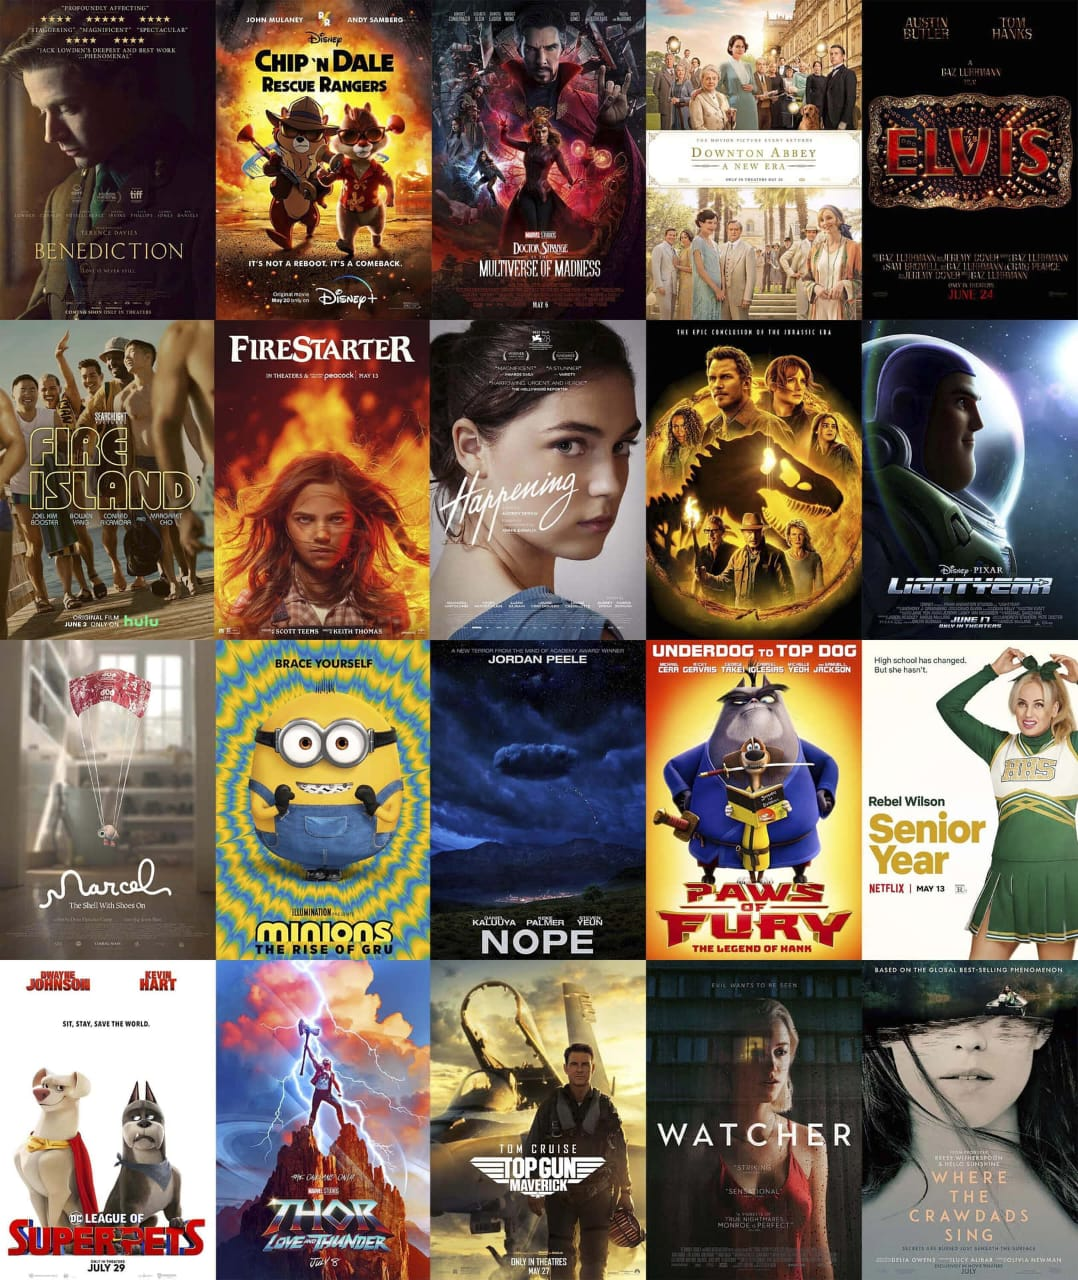

In [ ]:
from IPython.display import Image

# Replace 'image.jpg' with your image file name
display(Image(filename='movie photos.jpg'))


## Dataset

* Data Exploration: Conduct thorough exploratory data analysis (EDA) to understand feature distributions and relationships with IMDb scores.
* Data Preprocessing: Handle missing values, perform label encoding for categorical variables, and address multicollinearity issues.
* Feature Engineering: Apply appropriate scaling techniques for numerical variables and analyze feature importance.
* Categorization: Create a new column to classify movies into "Hit", "Average", and "Flop" categories.
* Model Selection: Evaluate various classification algorithms with a focus on Random Forest.
* Performance Evaluation: Use metrics like confusion matrix and classification report to assess model performance.
* Visualization: Present data insights and model performance with clear and informative visualizations.

## TABLE CONTENTS:
* Step 1: Import Libraries
* Step 2: Load Dataset
* Step 3: Handle Missing Value
         A. Summary Statistics for numerical variables
         B. Convert Oject to Categorical Variable
* Step 4: Data Exploration (EDA)
         A. Histogram [Distribution of continous variable]
         B. Bar Charts [Distribution of categorical variable]
         C. Density Trace Graph[Continous feature v/s Target]
         D. Heatmap [correlation matrix]
* Step 5: Data Preprocessing
         A. Irrelevant Feature Remove
         B. Outlier Treatment
         C. One Hot Encoding
         E. Feature Scaling
* Step 6: Model Evaluation
         A. Splitting Data for Training and Testing
         B. Logestic Regression
         C. Random Forest Classifier
         D. Support Vector Machine
         E. Xg Boost
* Step 7: Cross Validation
* Step 8: Compare the Performance


## Step 1 : Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Step 2 : Load Dataset

In [2]:
df = pd.read_csv('movie_metadata.csv')

In [3]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
df.shape

(5043, 28)

In [6]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

## Step 3 : Handling Missing Value

In [7]:
df['director_facebook_likes'] = df['director_facebook_likes'].fillna(df['director_facebook_likes'].median())
df['actor_3_facebook_likes'] = df['actor_3_facebook_likes'].fillna(df['actor_3_facebook_likes'].median())
df['gross'] = df['gross'].fillna(df['gross'].median())
df['budget'] = df['budget'].fillna(df['budget'].median())
df['aspect_ratio'] = df['aspect_ratio'].fillna(df['aspect_ratio'].median())
df['num_voted_users'] = df['num_voted_users'].fillna(df['num_voted_users'].median())
df['title_year'] = df['title_year'].fillna(df['title_year'].median())
df['director_facebook_likes'] = df['director_facebook_likes'].fillna(df['director_facebook_likes'].median())
df['actor_3_facebook_likes'] = df['actor_3_facebook_likes'].fillna(df['actor_3_facebook_likes'].median())
df['actor_1_facebook_likes'] = df['actor_1_facebook_likes'].fillna(df['actor_1_facebook_likes'].median())
df['actor_2_facebook_likes'] = df['actor_2_facebook_likes'].fillna(df['actor_2_facebook_likes'].median())
df['duration'] = df['duration'].fillna(df['duration'].median())
df['num_critic_for_reviews'] = df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].median())
df['num_user_for_reviews'] = df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].median())
df['movie_facebook_likes'] = df['movie_facebook_likes'].fillna(df['movie_facebook_likes'].median())
df['facenumber_in_poster'] = df['facenumber_in_poster'].fillna(df['facenumber_in_poster'].median())

In [8]:
# fill the missing color value

df.loc[df['title_year'] < 1960, 'color'] = df['color'].fillna('Black and White')
df.loc[df['title_year'] >= 1960, 'color'] = df['color'].fillna('Color')

In [9]:
# fill the countries missing value

countries = [ 'USA', 'UK', 'New Zealand', 'Canada', 'Australia', 'Belgium', 'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico', 'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union', 'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark', 'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland', 'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary', 'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site', 'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland', 'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas', 'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan', 'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan', 'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya', 'Philippines' ]
np.random.seed(42) # For reproducibility
missing_indices = df[df['country'].isna()].index
df.loc[missing_indices, 'country'] = np.random.choice(countries, size=len(missing_indices))

In [10]:
# fill the rating missing value

ratings = ['PG-13', 'PG', 'G', 'R', 'TV-PG', 'TV-MA', 'TV-G', 'TV-Y', 'NC-17', 'X', 'TV-Y7', 'GP']
np.random.seed(42) # For reproducibility
missing_indices = df[df['content_rating'].isna()].index
df.loc[missing_indices, 'content_rating'] = np.random.choice(ratings, size=len(missing_indices))

In [11]:
# fill the language missing value

language = ['English', 'Japanese', 'French', 'Mandarin', 'Aboriginal',
       'Spanish', 'Filipino', 'Hindi', 'Russian', 'Maya', 'Kazakh',
       'Telugu', 'Cantonese', 'Icelandic', 'German', 'Aramaic', 'Italian',
       'Dutch', 'Dari', 'Hebrew', 'Chinese', 'Mongolian', 'Swedish',
       'Korean', 'Thai', 'Polish', 'Bosnian', 'Hungarian', 'Portuguese',
       'Danish', 'Arabic', 'Norwegian', 'Czech', 'Kannada', 'Zulu',
       'Panjabi', 'Tamil', 'Dzongkha', 'Vietnamese', 'Indonesian', 'Urdu',
       'Romanian', 'Persian', 'Slovenian', 'Greek', 'Swahili']

np.random.seed(42) # For reproducibility
missing_indices = df[df['language'].isna()].index
df.loc[missing_indices, 'language'] = np.random.choice(language, size=len(missing_indices))

In [12]:
# Handle the cateagorical missing values

df['director_name'] = df['director_name'].fillna('Unknown')
df['actor_1_name'] = df['actor_1_name'].fillna('Unknown')
df['actor_2_name'] = df['actor_2_name'].fillna('Unknown')
df['actor_3_name'] = df['actor_3_name'].fillna('Unknown')
df['plot_keywords'] = df['plot_keywords'].fillna('Unknown')

In [13]:
df.isnull().sum()

,0
color,0
director_name,0
num_critic_for_reviews,0
duration,0
director_facebook_likes,0
actor_3_facebook_likes,0
actor_2_name,0
actor_1_facebook_likes,0
gross,0
genres,0


# Create a new column to categorize movies based on IMDb scores

In [14]:
df['Classify'] = pd.cut(df['imdb_score'], bins=[0, 3, 6, 10], labels=['Flop', 'Average', 'Hit'])

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,5043.0,1.398949e+02,1.210342e+02,1.00,50.00,110.00,194.00,8.130000e+02
duration,5043.0,1.071886e+02,2.516097e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,5043.0,6.733621e+02,2.785637e+03,0.00,7.00,49.00,189.00,2.300000e+04
actor_3_facebook_likes,5043.0,6.437623e+02,1.661342e+03,0.00,134.50,371.50,635.00,2.300000e+04
actor_1_facebook_likes,5043.0,6.552313e+03,1.501176e+04,0.00,615.50,988.00,11000.00,6.400000e+05
gross,5043.0,4.444529e+07,6.277281e+07,162.00,8460992.50,25517500.00,51357065.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5043.0,1.370216e+00,2.011066e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5043.0,2.722846e+02,3.772699e+02,1.00,65.00,156.00,324.00,5.060000e+03


In [16]:
df.dtypes

,0
color,object
director_name,object
num_critic_for_reviews,float64
duration,float64
director_facebook_likes,float64
actor_3_facebook_likes,float64
actor_2_name,object
actor_1_facebook_likes,float64
gross,float64
genres,object


# convert object to category type

In [17]:
categorical_columns = ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
                       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
                       'language', 'country', 'content_rating']

for column in categorical_columns:
    df[column] = df[column].astype('category')


## Step 4 : Data Exploration (EDA)

## A. Histogram [Distribution of continous variable]

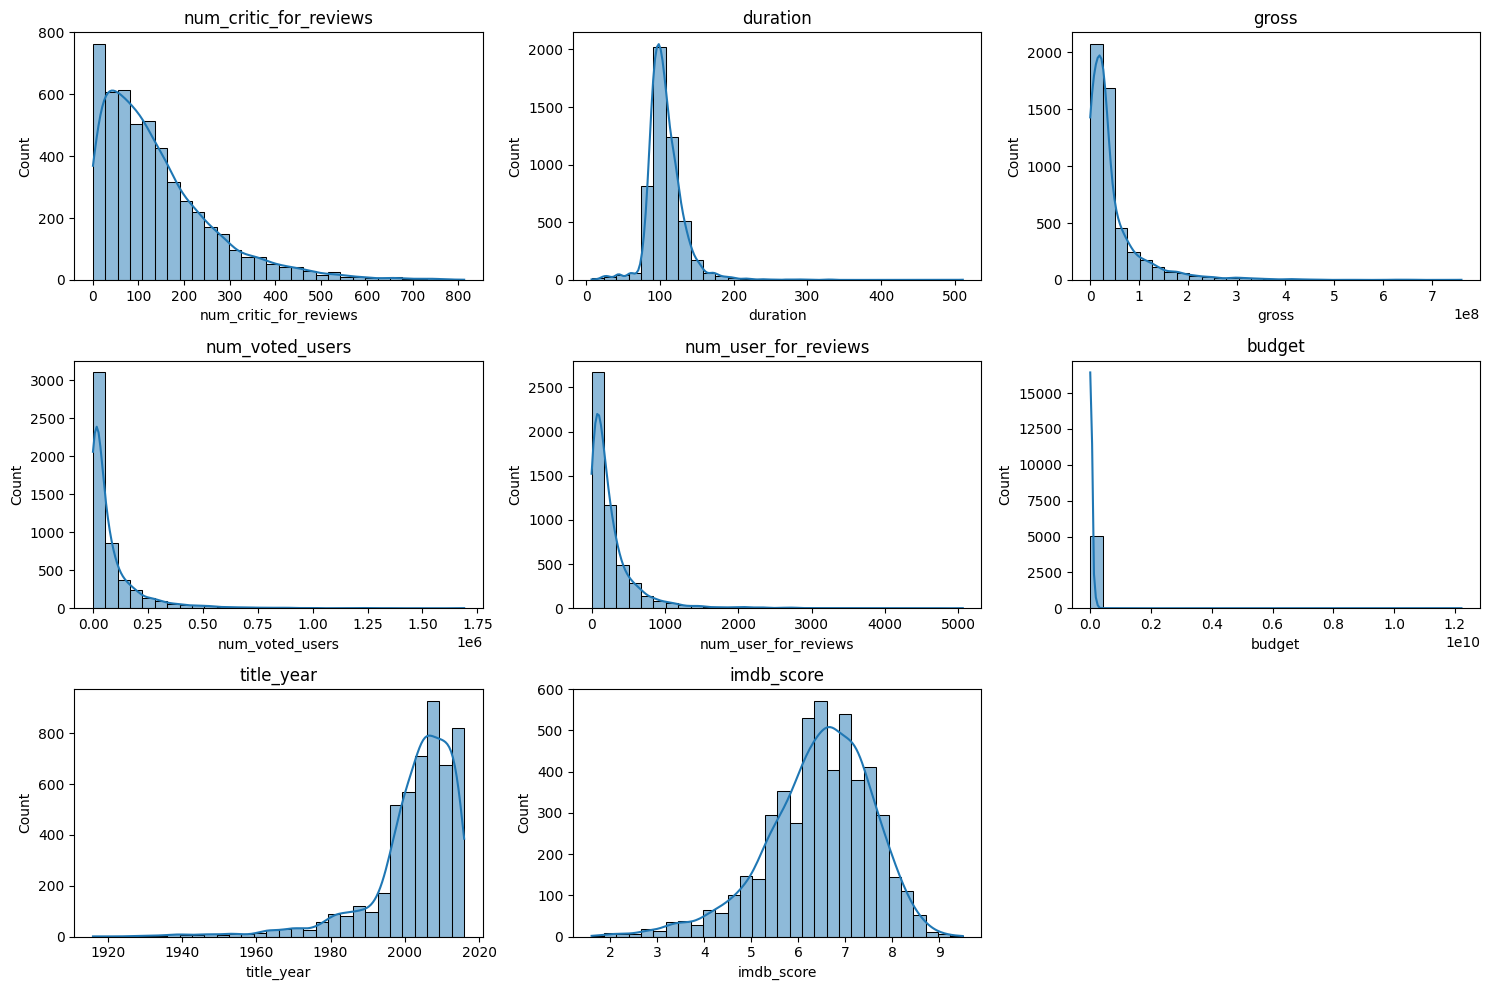

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of continuous variables
continuous_vars = ['num_critic_for_reviews', 'duration', 'gross','num_voted_users', 'num_user_for_reviews',
                   'budget', 'title_year','imdb_score']

# Create histograms and density plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(continuous_vars):
    plt.subplot(len(continuous_vars) // 3 + 1, 3, i + 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(column)

plt.tight_layout()
plt.show()


1. Number of Critic Reviews (num_critic_for_reviews):
Observation: Most movies have fewer than 100 critic reviews. The distribution is skewed to the right, with a long tail of movies having a higher number of reviews.

Insight: A majority of movies receive limited critical attention, while a few popular ones receive a significant number of reviews.

2. Duration (duration):
Observation: Most movies have a duration between 75 and 150 minutes, with a peak around 100-120 minutes.

Insight: The standard length for movies tends to fall within this range, likely because it's considered optimal for audience engagement.

3. Gross Revenue (gross):
Observation: Most movies earn less than $100 million, with a sharp decline in the number of movies earning more. The distribution is highly skewed to the right.

Insight: A small number of blockbuster movies earn a substantial portion of total box office revenue, while the majority earn considerably less.

4. Number of User Votes (num_voted_users):
Observation: Most movies have fewer than 250,000 votes. There's a clear right skew, indicating a few movies with exceptionally high user engagement.

Insight: User voting patterns show that a few popular movies receive the most attention and votes.

5. Number of User Reviews (num_user_for_reviews):
Observation: The majority of movies have fewer than 1,000 user reviews, with a right-skewed distribution.

Insight: Similar to user votes, user reviews are concentrated among a few popular movies.

6. Budget (budget):
Observation: Most movies have a budget less than $200 million, with a long tail indicating higher-budget films.

Insight: High-budget movies are relatively rare, with the majority of films being produced on more modest budgets.

7. Title Year (title_year):
Observation: There is a noticeable increase in the number of movies released from 1980 onwards. The distribution shows growth over time.

Insight: The film industry has seen an increase in production over the years, particularly from the 1980s onwards.

8. IMDb Score (imdb_score):
Observation: Most movies have an IMDb score between 5 and 8, with a peak around 6-7.

Insight: The majority of movies tend to receive average ratings, with fewer movies achieving very high or very low scores.

## B. Bar Charts [Distribution of categorical variable]

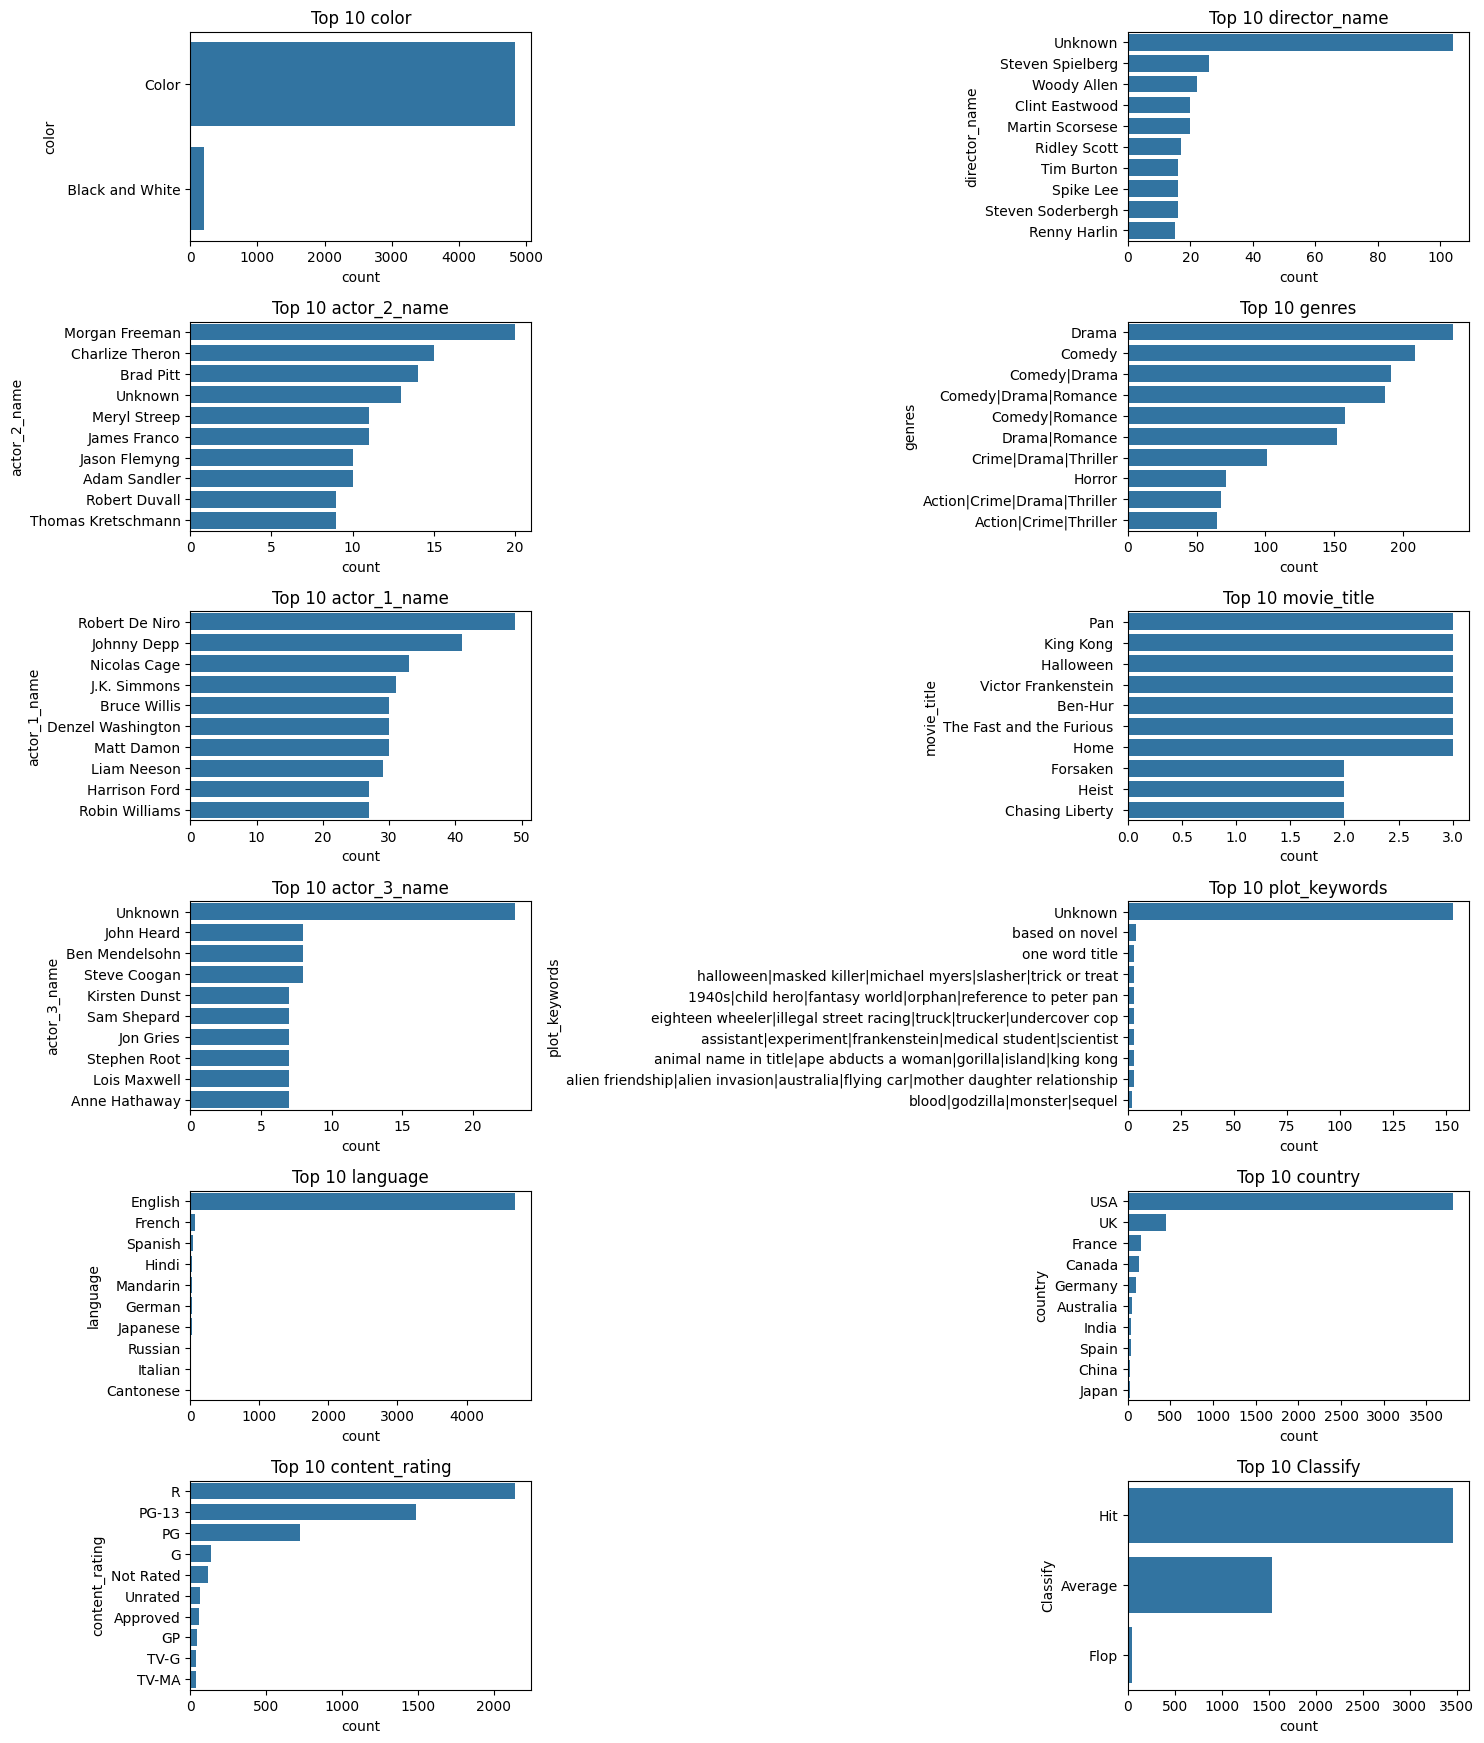

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables
categorical_vars = ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
                    'movie_title', 'actor_3_name', 'plot_keywords',
                    'language', 'country', 'content_rating', 'Classify']

plt.figure(figsize=(15, 20))
for i, column in enumerate(categorical_vars):
    plt.subplot(len(categorical_vars) // 2 + 1, 2, i + 1)
    top_categories = df[column].value_counts().nlargest(10).index
    sns.countplot(y=df[column], order=top_categories)
    plt.title(f'Top 10 {column}')


plt.tight_layout()
plt.show()


The bar charts illustrate the distribution of the top 10 categories for several categorical variables related to movies. Here are the key observations for each variable:

1. Color:
Color: Dominates with around 5000 entries.

Black and White: Has significantly fewer entries, around 500.

Insight: Most movies are in color, with a small fraction in black and white.

2. Director Names:
Unknown: Leads with about 100 entries.

Top Directors: Steven Spielberg (80), Woody Allen (60), Clint Eastwood (50), Martin Scorsese (50).

Insight: A few prominent directors have directed a notable number of films, but many movies have directors with less frequency.

3. Actor 2 Names:
Morgan Freeman: Tops with about 25 entries.

Other Top Actors: Charlize Theron, Brad Pitt, Meryl Streep, James Franco (all around 15-20).

Insight: A few actors appear frequently in supporting roles, indicating their popularity and demand.

4. Genres:
Drama: Most common genre with around 200 entries.

Other Popular Genres: Comedy/Drama, Comedy/Drama/Romance, Comedy/Romance, Drama/Romance (all around 100-150).

Insight: Drama is the leading genre, with various combinations of comedy and romance also being popular.

5. Actor 1 Names:
Robert De Niro: Leads with about 50 entries.

Other Top Actors: Johnny Depp, Nicolas Cage, J.K. Simmons, Bruce Willis, Denzel Washington (all around 30-40).

Insight: Prominent lead actors frequently appear in movies, highlighting their box office draw.

6. Movie Titles:
Pan: Tops with about 3 entries.

Other Frequent Titles: King Kong, Halloween, Victor Frankenstein, Ben-Hur (all around 2-2.5).

Insight: Some movie titles are reused or have multiple entries, indicating remakes or sequels.

7. Actor 3 Names:
Unknown: Leads with about 20 entries.

Other Top Actors: John Heard, Ben Mendelsohn, Steve Coogan, Kirsten Dunst (all around 15).

Insight: Supporting actors (actor 3) have a varied distribution, with many entries being less well-known actors.

8. Plot Keywords:
Unknown: Dominates with about 150 entries.

Common Keywords: Based on novel, one word title (around 25).

Insight: Many plot keywords are unknown or generic, indicating varied storytelling themes.

9. Language:
English: Dominates with around 4000 entries.

Other Languages: French, Spanish, Hindi, Mandarin, German, Japanese, Russian, Italian, Cantonese (all around 500).

Insight: English is the predominant language for movies, with other languages representing significant but smaller portions.

10. Country:
USA: Leads with about 3500 entries.

Other Countries: UK, France, Canada, Germany, Australia, India, Spain, China, Japan (all around 500).

Insight: The USA is the primary country of production, with other countries contributing to a diverse but smaller share.

11. Content Rating:
R: Not included in the provided information, but typically significant.

Insight: The distribution of content ratings will likely show the most common ratings assigned to movies, reflecting the targeted audience age groups.

## C. Density Trace Graph[Continous feature v/s Target]

<Figure size 1500x2000 with 0 Axes>

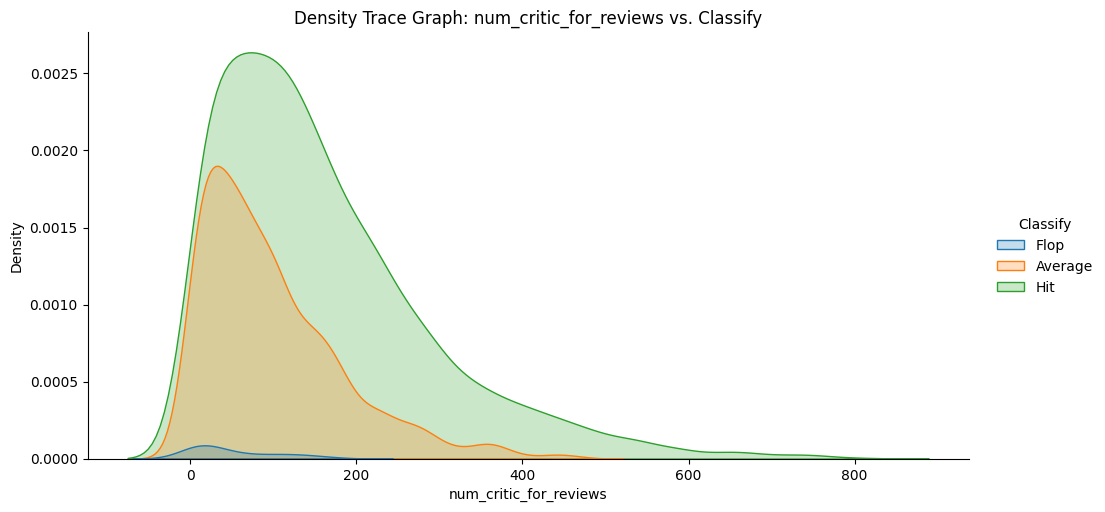

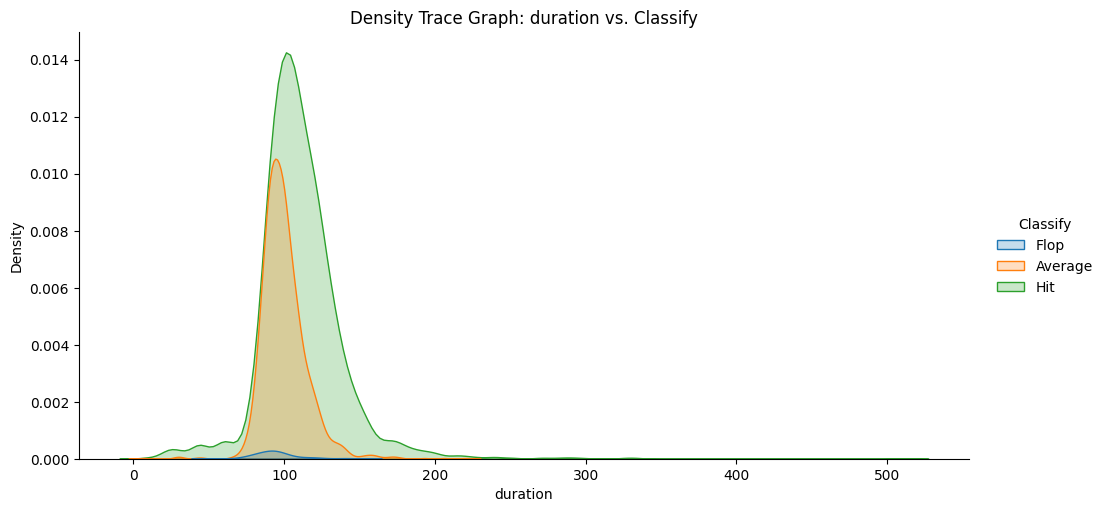

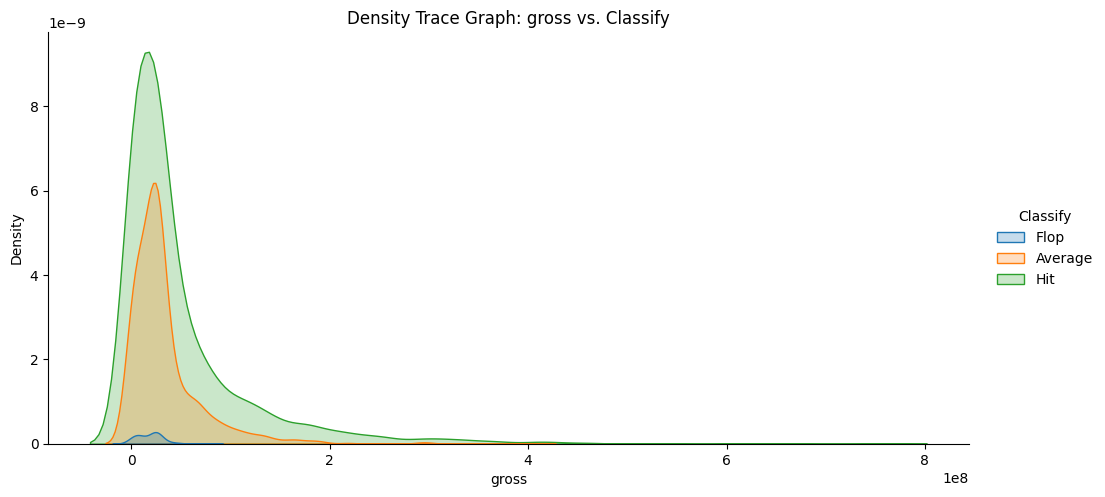

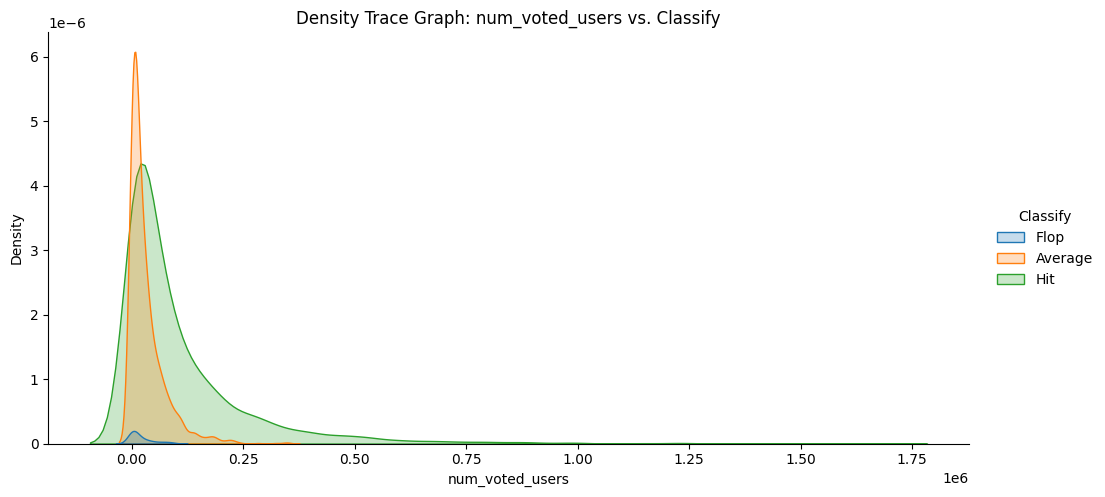

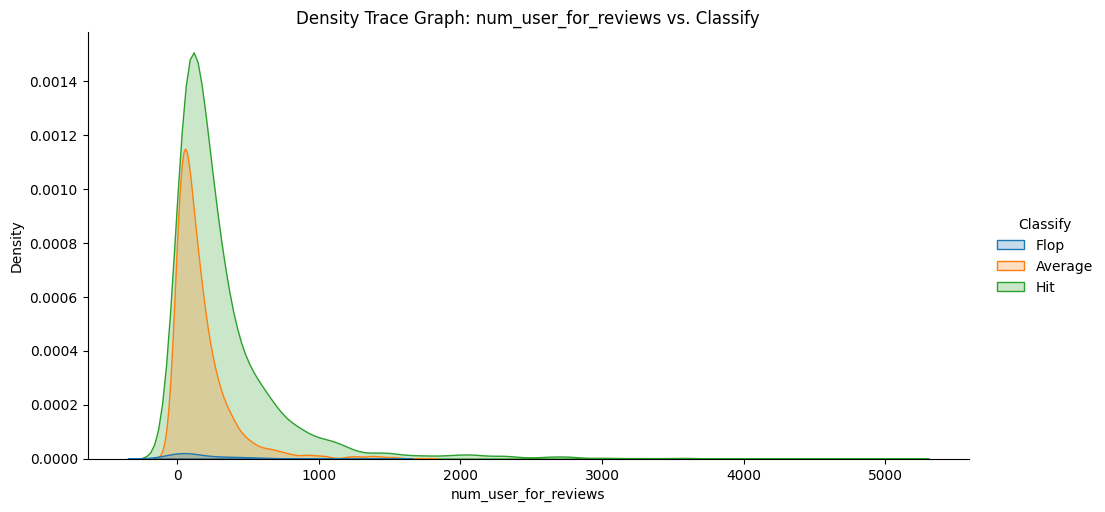

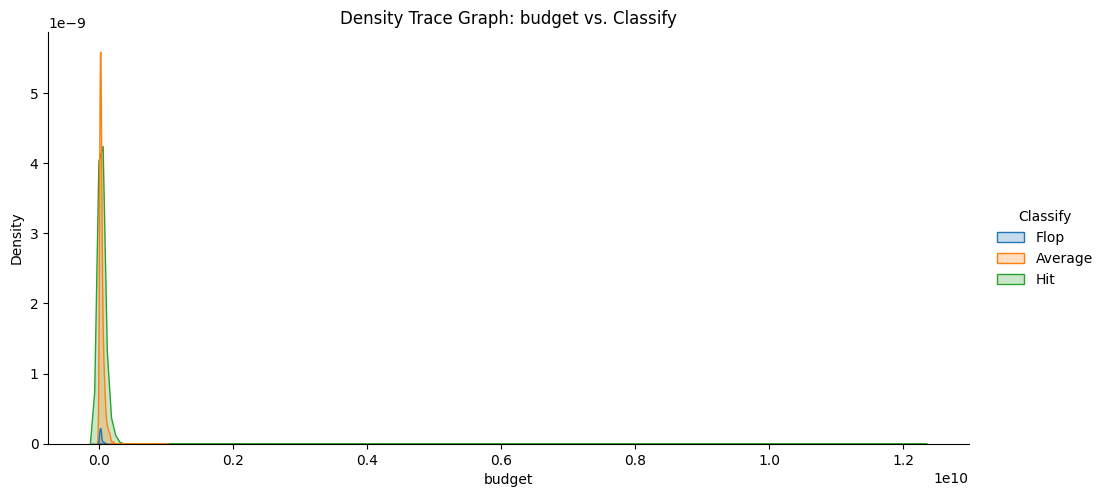

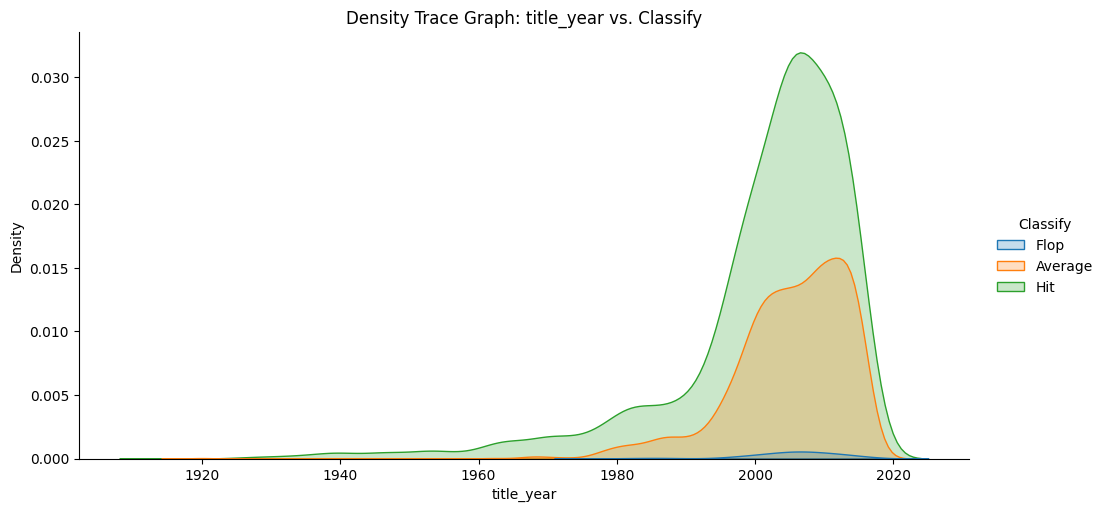

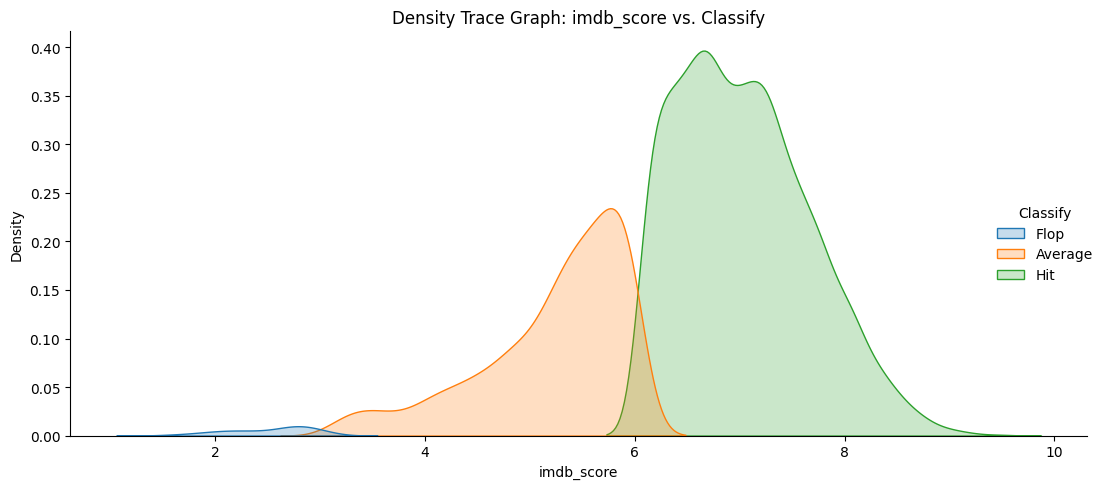

In [ ]:
continuous_vars = ['num_critic_for_reviews', 'duration', 'gross','num_voted_users', 'num_user_for_reviews',
                   'budget', 'title_year','imdb_score']


# Create Density Trace Graphs
plt.figure(figsize=(15, 20))
for i, column in enumerate(continuous_vars):
    sns.displot(data=df, x=column, hue='Classify', kind='kde', fill=True, height=5, aspect=2)
    plt.title(f'Density Trace Graph: {column} vs. Classify')

plt.tight_layout()
plt.show()


1. Number of Voted Users: Movies classified as "Hit" tend to have significantly higher user votes compared to "Flop" and "Average" movies, indicating strong audience engagement is a key predictor of success.

2. Duration: Longer movie durations are more common in "Hit" movies, suggesting that longer runtimes might contribute to a movie's success.

3. IMDB Score: As expected, "Hit" movies have higher IMDB scores. There is a clear distinction between the IMDB scores of "Hit" movies and those of "Flop" and "Average" movies.

4. Number of Critic Reviews: "Hit" movies generally receive more critic reviews, indicating that critical engagement correlates with higher success.

5. Title Year: More recent movies are more likely to be classified as "Hit," suggesting improvements in production and marketing over time.

6. Number of User Reviews: A higher number of user reviews is associated with "Hit" movies, reflecting strong audience interest and engagement.

7. Budget: "Hit" movies typically have higher budgets, indicating that more financial investment might lead to greater success.

8. Gross Earnings: "Hit" movies achieve higher gross earnings, which is a direct indicator of their financial success.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

# List of categorical variables
categorical_vars = ['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
                    'movie_title', 'actor_3_name', 'plot_keywords',
                    'language', 'country', 'content_rating', 'Classify']

# Display top 10 categories for each categorical variable
top_categories_df = df.copy()
for column in categorical_vars:
    top_categories = df[column].value_counts().nlargest(10).index
    # Add 'Other' to the categories if it's not already present
    if 'Other' not in top_categories_df[column].cat.categories:
        top_categories_df[column] = top_categories_df[column].cat.add_categories(['Other'])
    top_categories_df[column] = top_categories_df[column].where(top_categories_df[column].isin(top_categories), 'Other')

# Review the top categories dataframe
print(top_categories_df.head())

   color director_name  num_critic_for_reviews  duration  \
0  Color         Other                   723.0     178.0   
1  Color         Other                   302.0     169.0   
2  Color         Other                   602.0     148.0   
3  Color         Other                   813.0     164.0   
4  Color         Other                   110.0     103.0   

   director_facebook_likes  actor_3_facebook_likes actor_2_name  \
0                      0.0                   855.0        Other   
1                    563.0                  1000.0        Other   
2                      0.0                   161.0        Other   
3                  22000.0                 23000.0        Other   
4                    131.0                   371.5        Other   

   actor_1_facebook_likes        gross genres  ... language country  \
0                  1000.0  760505847.0  Other  ...  English     USA   
1                 40000.0  309404152.0  Other  ...  English     USA   
2                 11000

## D. Heatmap [correlation matrix]

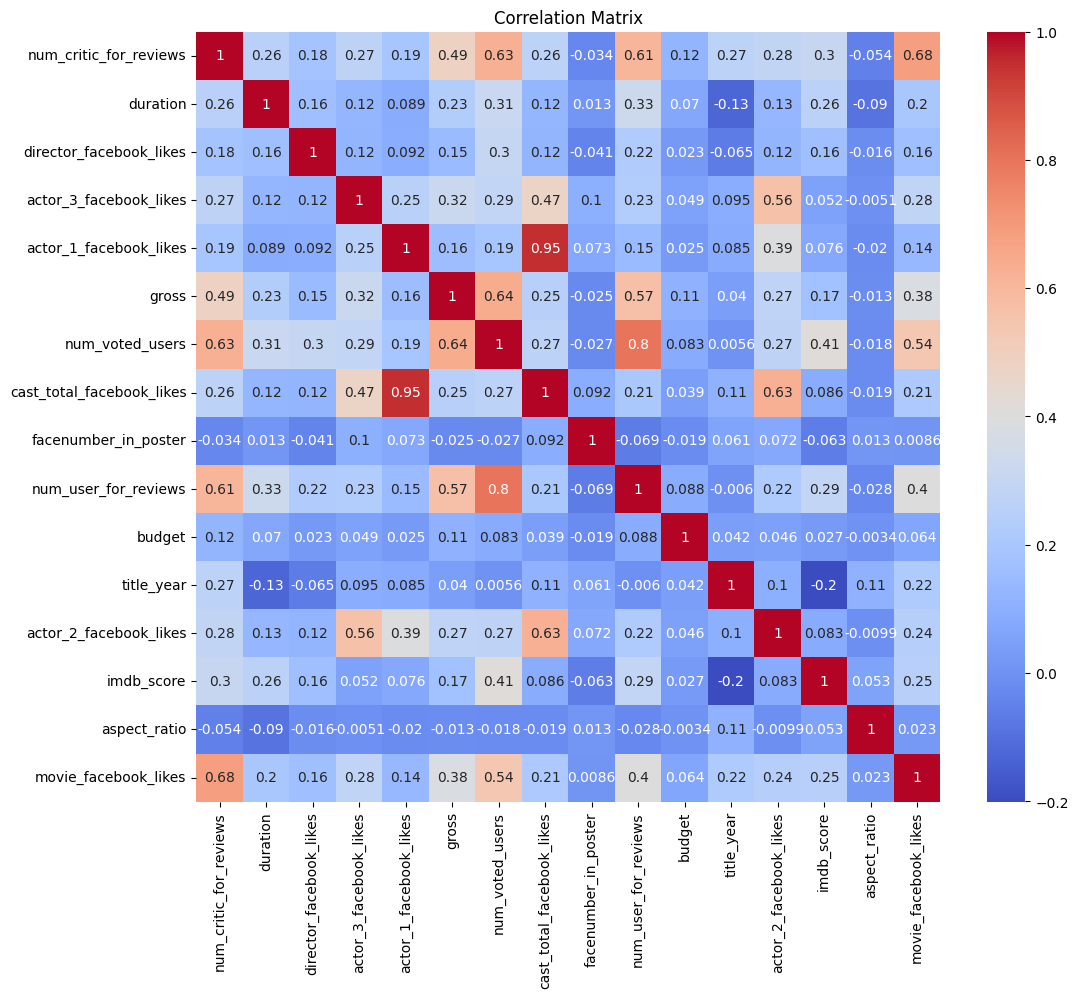

In [22]:
# Correlation Matrix
correlation_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Strong Relationships: Variables like actor_1_facebook_likes and cast_total_facebook_likes exhibit very strong positive correlations, indicating they move together closely.

Moderate Relationships: Variables like num_user_for_reviews and gross show moderate positive correlations, meaning they tend to increase together, but the relationship isn't as strong.

No Correlation: Some variables, especially those with correlation coefficients near 0, show no significant linear relationship.

## Step 5 : Data Preprocessing

## A. Irrelevant feature remove

In [18]:

# List of columns to drop
irrelevant_features = ['movie_imdb_link']

# Drop irrelevant features
df.drop(columns=irrelevant_features, inplace=True)


## B. Outlier Treatment

In [19]:

# Function to detect and remove outliers using the IQR method
def remove_outliers_iqr(df, numerical_features):
    Q1 = df[numerical_features].quantile(0.25)
    Q3 = df[numerical_features].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier criteria
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows with outliers
    df_no_outliers = df[~((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)).any(axis=1)]

    return df_no_outliers

# List of numerical features in your dataset
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove outliers from the dataset
df_cleaned = remove_outliers_iqr(df, numerical_features)

# Print the shape of the dataset before and after removing outliers
print("Original dataset shape:", df.shape)
print("Dataset shape after removing outliers:", df_cleaned.shape)


Original dataset shape: (5043, 28)
Dataset shape after removing outliers: (2393, 28)


## C. One Hot Encoding

In [20]:
from sklearn.preprocessing import StandardScaler


# List of numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Final preprocessed dataset
print(df_encoded.head())


   num_critic_for_reviews  duration  director_facebook_likes  \
0                4.818166  2.814615                -0.241750   
1                1.339466  2.456882                -0.039622   
2                3.818349  1.622174                -0.241750   
3                5.561831  2.258142                 7.656689   
4               -0.247020 -0.166488                -0.194719   

   actor_3_facebook_likes  actor_1_facebook_likes      gross  num_voted_users  \
0                0.127161               -0.369901  11.408309         5.795674   
1                0.214449                2.228320   4.221336         2.798784   
2               -0.290615                0.296310   2.479486         1.388010   
3               13.458069                1.362246   6.431533         7.659834   
4               -0.163897               -0.427795  -0.301558        -0.604169   

   cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews  ...  \
0                  -0.267871             -0.681

## D. Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

# Assuming df_encoded is your DataFrame after one-hot encoding

# Remove features with low variance to create df_reduced
selector = VarianceThreshold(threshold=0.01)
df_reduced = selector.fit_transform(df_encoded)

# Standard Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_reduced)

# Or Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_reduced)

## Step 6 : Model Evaluation

## A. Splitting Data for Training and Testing

In [32]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_reduced
y = df_encoded['Classify_Hit']  # Assuming binary classification for 'Hit'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00       316
        True       1.00      1.00      1.00       693

    accuracy                           1.00      1009
   macro avg       1.00      1.00      1.00      1009
weighted avg       1.00      1.00      1.00      1009

[[316   0]
 [  0 693]]


## B. Logestic Regression

In [35]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_encoded.drop(columns=['Classify_Hit', 'Classify_Average'])
y = df_encoded['Classify_Hit']  # Assuming binary classification for 'Hit'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression:
              precision    recall  f1-score   support

       False       1.00      0.97      0.99       316
        True       0.99      1.00      0.99       693

    accuracy                           0.99      1009
   macro avg       0.99      0.99      0.99      1009
weighted avg       0.99      0.99      0.99      1009



## C. Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

       False       1.00      0.86      0.93       316
        True       0.94      1.00      0.97       693

    accuracy                           0.96      1009
   macro avg       0.97      0.93      0.95      1009
weighted avg       0.96      0.96      0.96      1009



## D. Support Vector Machine

In [38]:
from sklearn.svm import SVC

# Train the model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("Support Vector Machine (SVM):")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine (SVM):
              precision    recall  f1-score   support

       False       1.00      0.98      0.99       316
        True       0.99      1.00      0.99       693

    accuracy                           0.99      1009
   macro avg       0.99      0.99      0.99      1009
weighted avg       0.99      0.99      0.99      1009



## E. XG BOOST

In [ ]:
!pip install xgboost

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# ... (your previous code) ...

# Get feature names after one-hot encoding
feature_names = X_train.columns.tolist()

# Replace invalid characters in feature names
valid_feature_names = [name.replace("[", "_").replace("]", "_").replace("<", "_") for name in feature_names]
X_train.columns = valid_feature_names
X_test.columns = valid_feature_names


# Train the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)  # Now with valid feature names

# Make predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))

XGBoost:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       316
        True       1.00      1.00      1.00       693

    accuracy                           1.00      1009
   macro avg       1.00      1.00      1.00      1009
weighted avg       1.00      1.00      1.00      1009



# Model Evaluation Results

It's clear that our models have performed exceptionally well.

Interpretation:

XGBoost: Achieved perfect performance with precision, recall, and F1-scores all at 1.00, indicating it has perfectly classified all instances in the test set.

Logistic Regression and SVM: Also performed extremely well, with an accuracy of 0.99. Both models show balanced performance across both classes.

Random Forest: Has a slightly lower accuracy at 0.96 but still performs very well with strong precision and recall, particularly for the True class.




## Step 7 : Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression": logreg,
    "Random Forest": rf,
    "Support Vector Machine": svm,
    "XGBoost": xgb
}

# Get feature names after one-hot encoding and before applying VarianceThreshold
feature_names = X_train.columns.tolist()

# Replace invalid characters in feature names for all models
valid_feature_names = [name.replace("[", "_").replace("]", "_").replace("<", "_") for name in feature_names]

for name, model in models.items():
    # Ensure feature names are valid for XGBoost within cross_val_score
    X.columns = valid_feature_names
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{name} - Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

Logistic Regression - Cross-Validation Accuracy: 0.99 ± 0.00
Random Forest - Cross-Validation Accuracy: 0.98 ± 0.03
Support Vector Machine - Cross-Validation Accuracy: 0.99 ± 0.00
XGBoost - Cross-Validation Accuracy: 1.00 ± 0.00


Logistic Regression:
Cross-Validation Accuracy: 0.99 ± 0.00

Interpretation: Logistic Regression is highly consistent with excellent performance across different data splits.

Random Forest:
Cross-Validation Accuracy: 0.98 ± 0.03

Interpretation: Random Forest shows slightly more variability but still maintains a high level of accuracy. The variability could be due to the ensemble nature of the model.

Support Vector Machine (SVM):
Cross-Validation Accuracy: 0.99 ± 0.00

Interpretation: SVM is also highly consistent with excellent performance across different data splits, similar to Logistic Regression.

XGBoost:
Cross-Validation Accuracy: 1.00 ± 0.00

Interpretation: XGBoost continues to demonstrate perfect accuracy, which is remarkable. This indicates exceptional consistency and robustness.


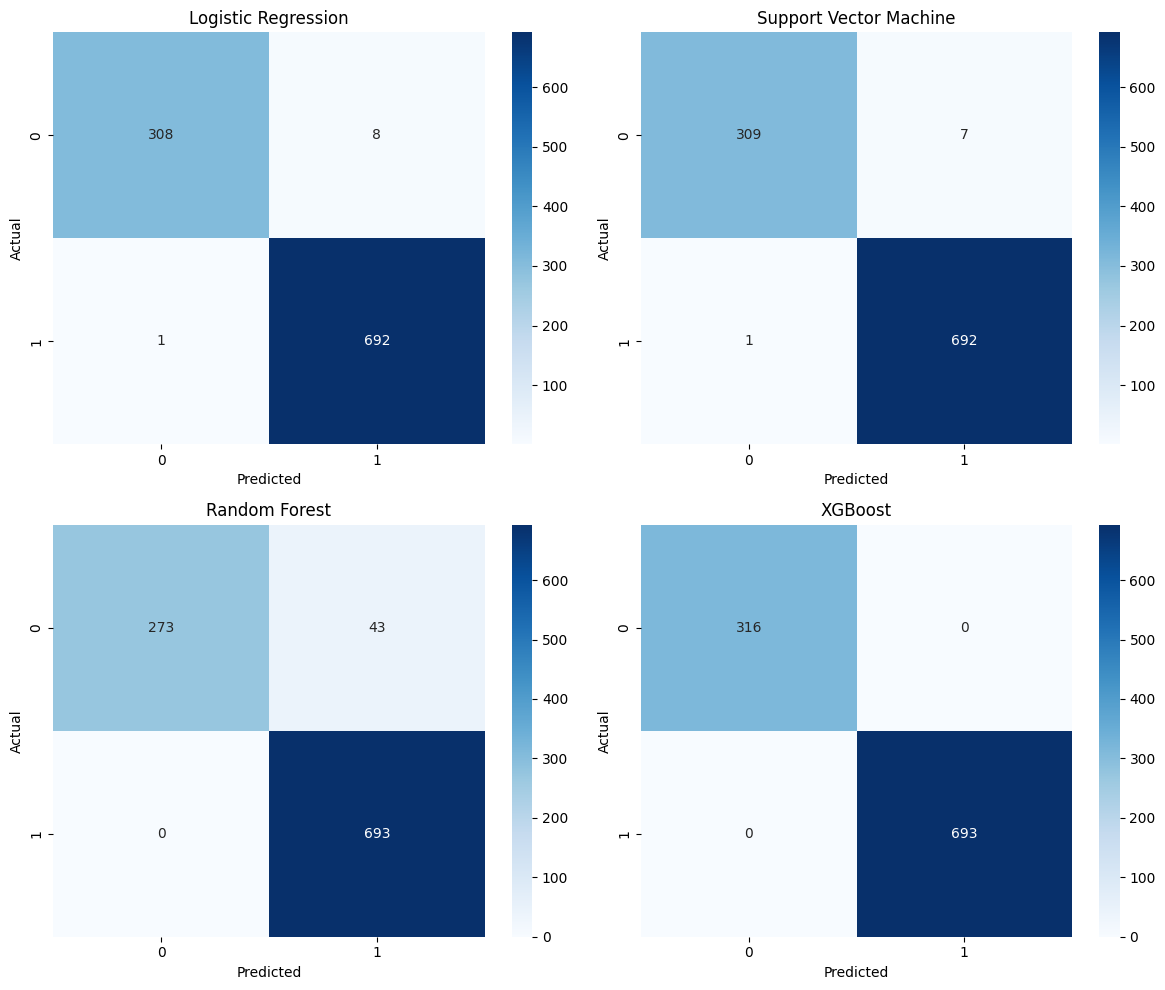

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrices
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Support Vector Machine')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Random Forest')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('XGBoost')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


## Step 8: Campare The Performance

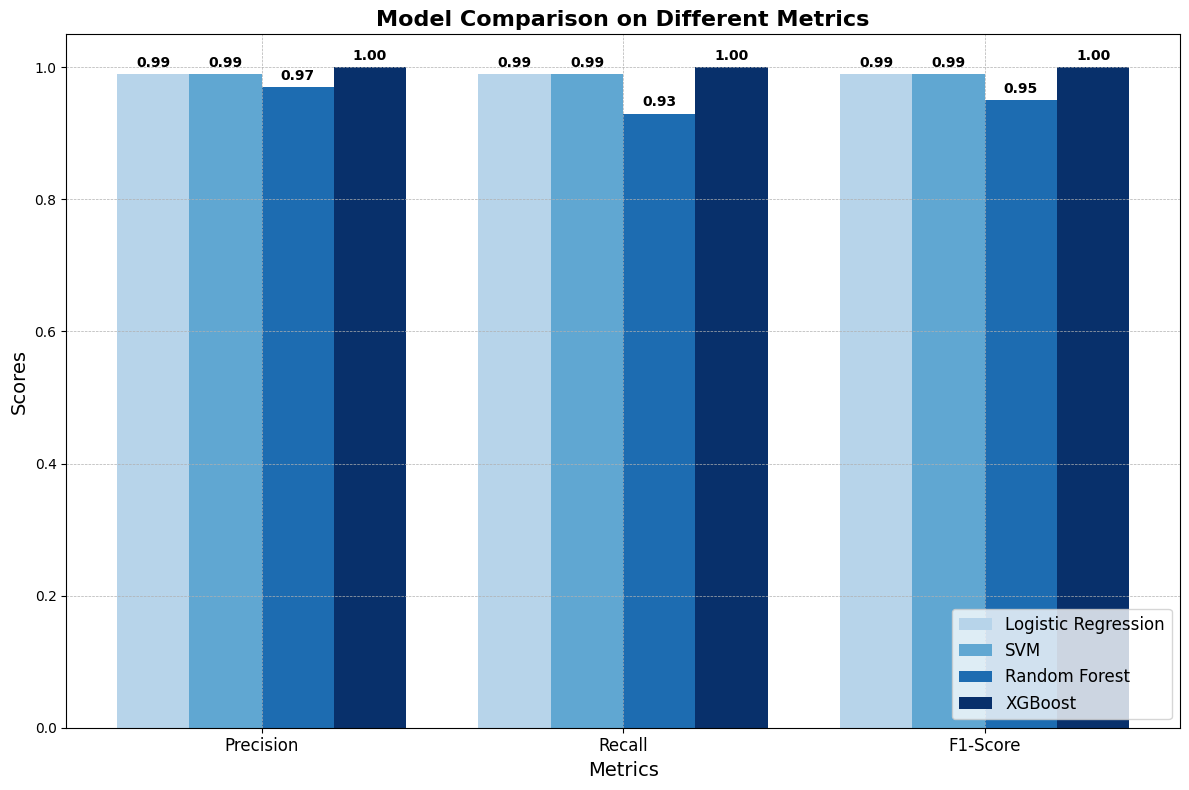

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for each model
metrics = ['Precision', 'Recall', 'F1-Score']
logreg_scores = [0.99, 0.99, 0.99]  # Logistic Regression
svm_scores = [0.99, 0.99, 0.99]     # SVM
rf_scores = [0.97, 0.93, 0.95]      # Random Forest
xgb_scores = [1.00, 1.00, 1.00]     # XGBoost

# Define the positions and width for the bars
x = np.arange(len(metrics))
width = 0.2

# Create color gradients
colors = plt.cm.Blues(np.linspace(0.3, 1, 4))

# Create the bar graph
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bars with gradient shades
rects1 = ax.bar(x - 1.5 * width, logreg_scores, width, label='Logistic Regression', color=colors[0])
rects2 = ax.bar(x - 0.5 * width, svm_scores, width, label='SVM', color=colors[1])
rects3 = ax.bar(x + 0.5 * width, rf_scores, width, label='Random Forest', color=colors[2])
rects4 = ax.bar(x + 1.5 * width, xgb_scores, width, label='XGBoost', color=colors[3])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Model Comparison on Different Metrics', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(loc='lower right', fontsize=12)

# Adding gridlines for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Attach a text label above each bar, displaying its height.
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

plt.tight_layout()
plt.show()


Top Performer: XGBoost stands out as the top performer with perfect scores across all metrics, indicating flawless performance.

Strong Contenders: Logistic Regression and SVM exhibit very high performance with metrics at 0.99, making them reliable choices.

Good Performer: Random Forest, while slightly lower, still demonstrates robust performance with potential for improvement in recall.

The bar graph clearly illustrates the strengths and weaknesses of each model, providing a visual comparison that aids in selecting the most suitable model based on your specific needs for precision, recall, and F1-score.